# All Import

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import scipy.stats as st
import statsmodels as sm
import math

# Read All Files

In [5]:
df1 = pd.read_csv('fifa.csv')
df3 = pd.read_csv('black_friday.csv')
df4 = pd.read_csv('crypto.csv')
df5 = pd.read_csv('athletes.csv')

# Graph Function

In [3]:
# Sumber: stackoverflow

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [
        st.beta, st.chi,st.chi2, st.dgamma,st.dweibull,st.expon,st.f,
        st.gamma,st.lognorm,st.norm,st.uniform
    ]
    
    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Soal 1

## Visualisasi

### Visualisasi Histogram

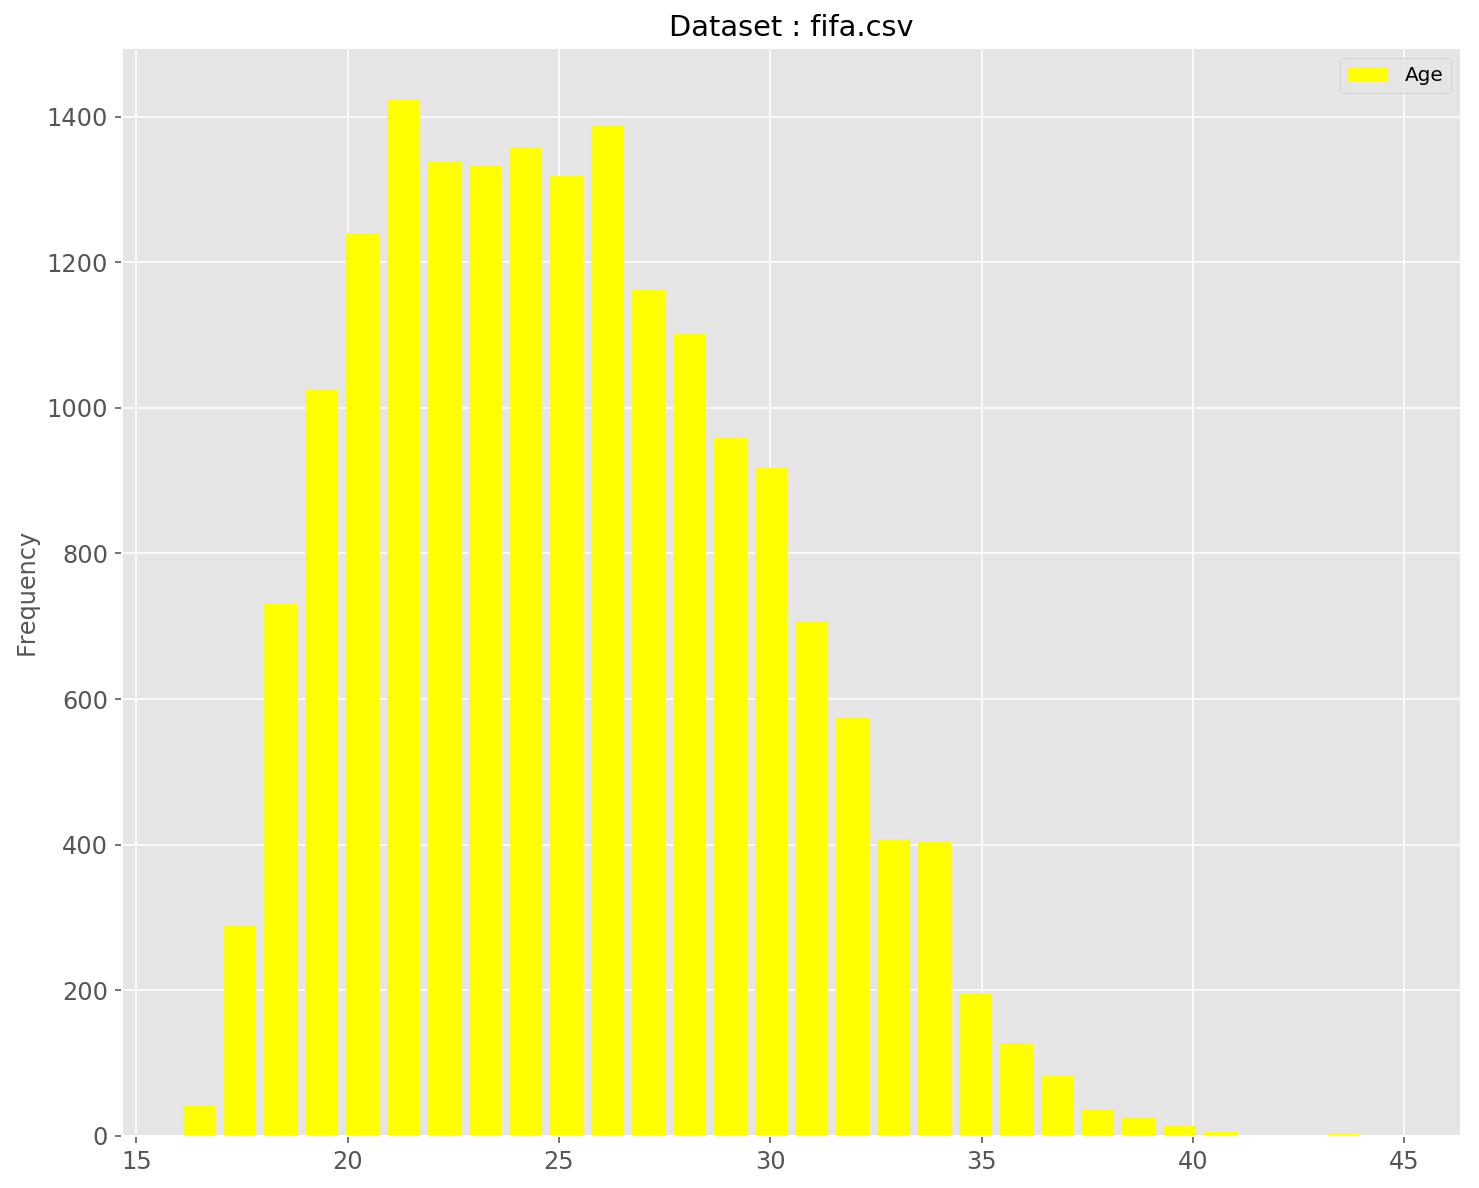

In [4]:
df1.plot(kind = 'hist',color = 'yellow', bins =30, rwidth = 0.8, fontsize = 'large', figsize = (12,10), title = 'Dataset : fifa.csv', grid = True) #Menampilkan grafik histogram dari atribut umur pada dataframe fifa

### Visualisasi BoxPlot

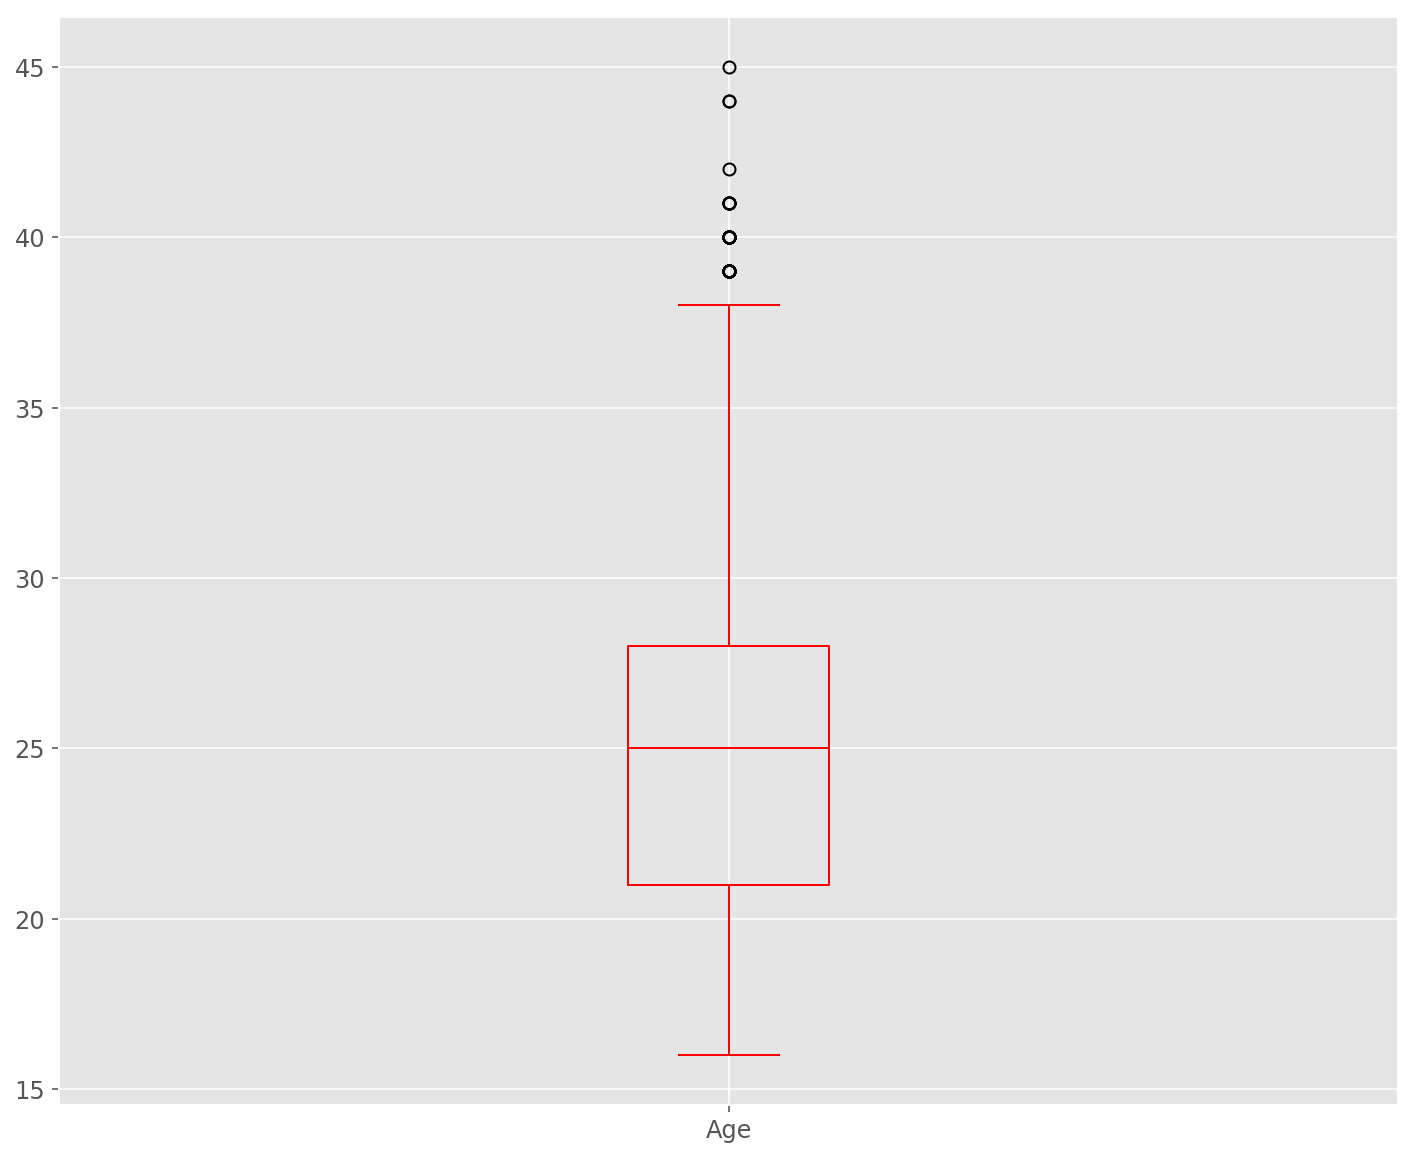

In [5]:
df1.plot(kind = 'box',color = 'red', fontsize = 'large', figsize = (12,10), grid= True) #Menampilkan grafik box plot dari atribut umur pada dataframe fifa

## Statistical Description

### Maximum

In [6]:
df1.max(numeric_only = True) #Nilai maximum dari dataframe fifa

Age    45
dtype: int64

### Minimum

In [7]:
df1.min(numeric_only= True) #Nilai minimum dari dataframe fifa

Age    16
dtype: int64

### Mean

In [8]:
df1.mean() #Nilai rata-rata dari dataframe fifa

Age    25.122206
dtype: float64

### Mode

In [6]:
df1.mode().iloc[0]['Age'] #Modus yang diperleh dari dataframe fifa

21

### Median

In [10]:
df1.median() #Nilai Median dari dataframe fifa

Age    25.0
dtype: float64

### Variance

In [11]:
df1.var() #Nilai variansi dari dataframe fifa

Age    21.808365
dtype: float64

### Standard Deviation

In [12]:
df1.std() #Nilai standard deviasi dari dataframe fifa

Age    4.669943
dtype: float64

### Skewness

In [13]:
df1.skew() #Mendapatkan nilai skew (karena skew >0 maka skew right)

Age    0.391764
dtype: float64

### Kurtosis

In [14]:
df1.kurtosis() # Mendapatkan nilai kurtosis

Age   -0.459514
dtype: float64

## Fungsi Distribusi Peluang

Text(0,0.5,'Frequency')

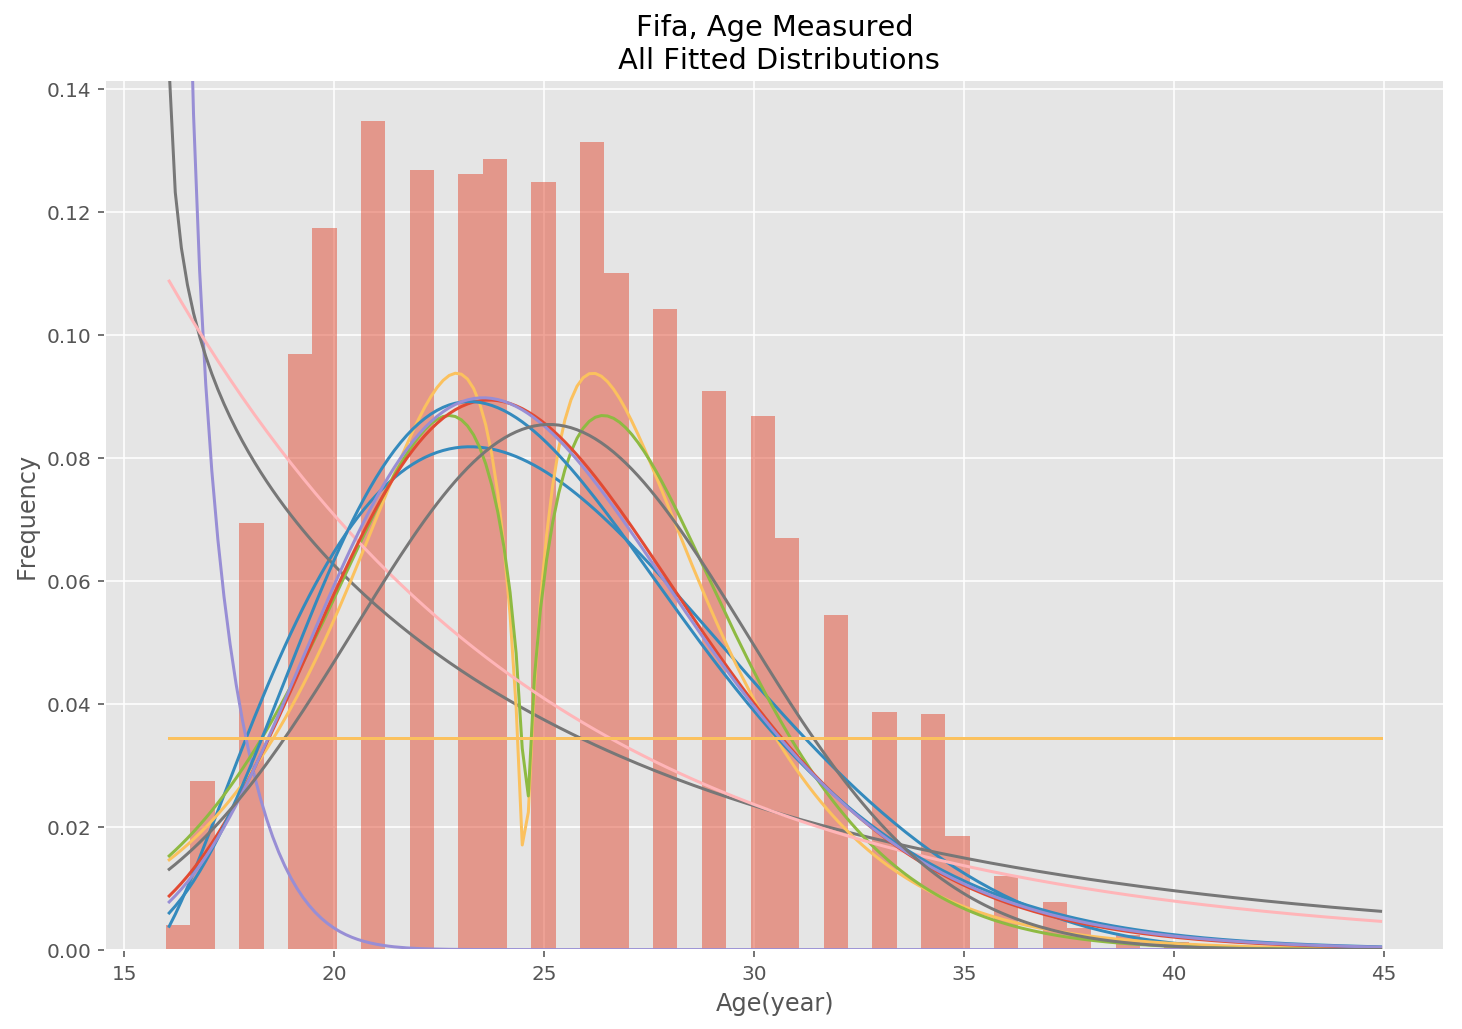

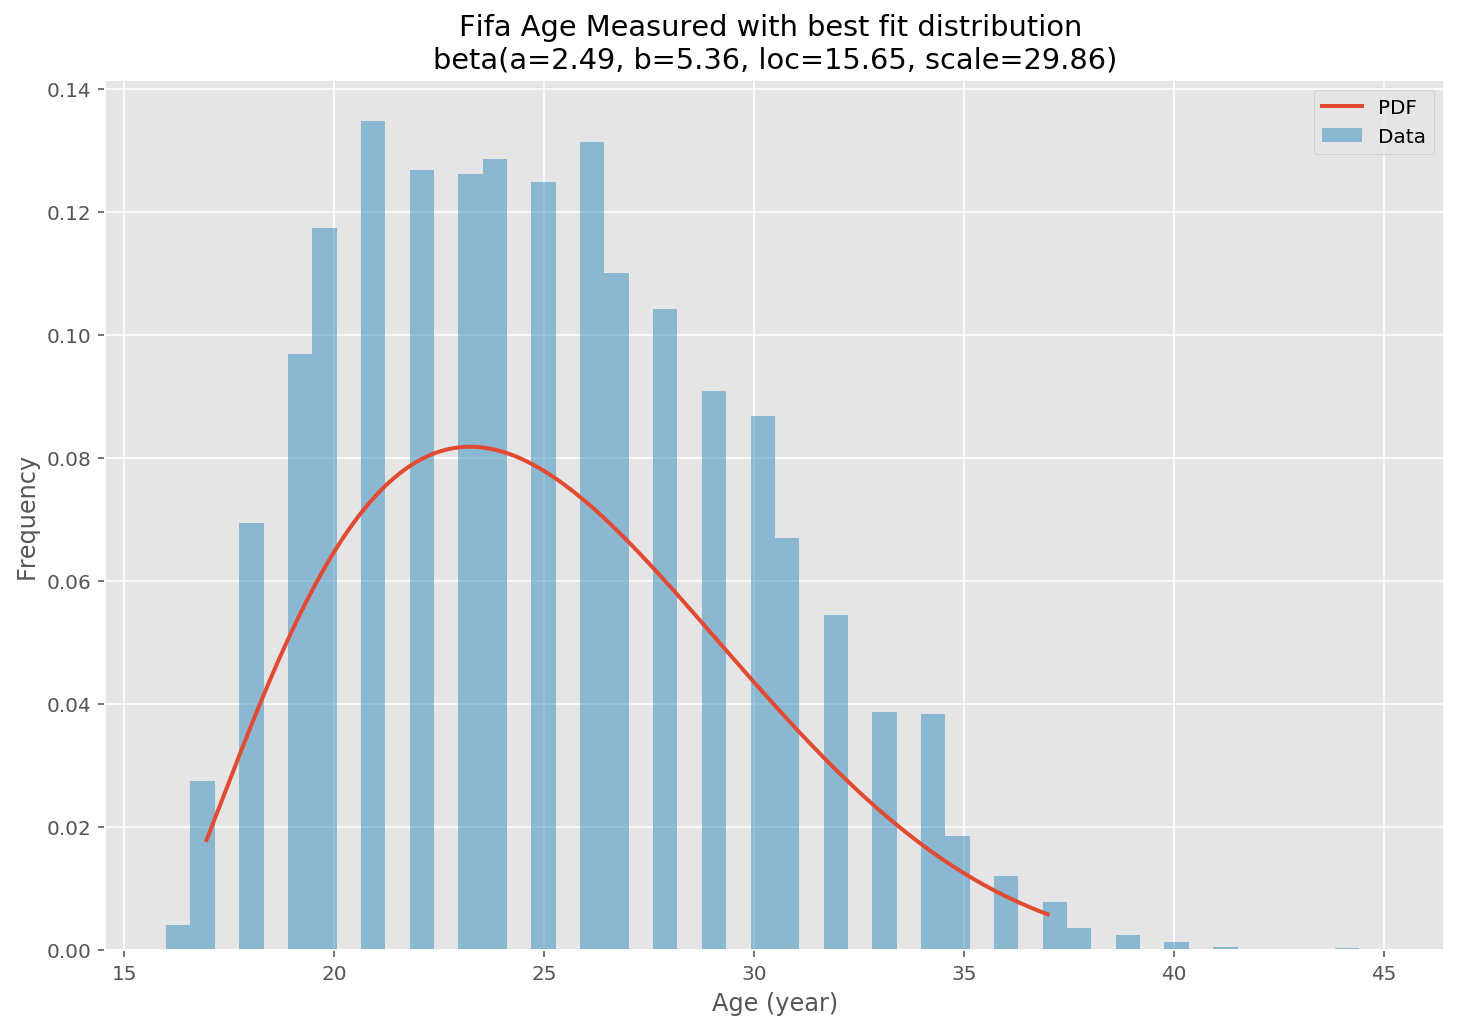

In [60]:
# Load data from statsmodels datasets
data = df1['Age']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Fifa, Age Measured\n All Fitted Distributions')
ax.set_xlabel(u'Age(year)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Fifa Age Measured with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Age (year)')
ax.set_ylabel('Frequency')

## Pertanyaan

### a.Jika terdapat 1000 pemain bola baru yang ditambahkan oleh Tsubasa,tentukan ekspektasi umur pemain bola yang:

#### i. Berumur kurang dari 22 tahun

In [61]:
print(math.floor(best_dist.cdf(22,*best_fit_params)*1000)) #Ekspektasi X<22

287


#### ii. Berumur lebih dari 40 tahun

In [68]:
print(math.floor((1-best_dist.cdf(40,*best_fit_params))*1000)) #Ekspektasi X>40

1


# Soal 3

## Visualisasi

### Visualisasi Histogram

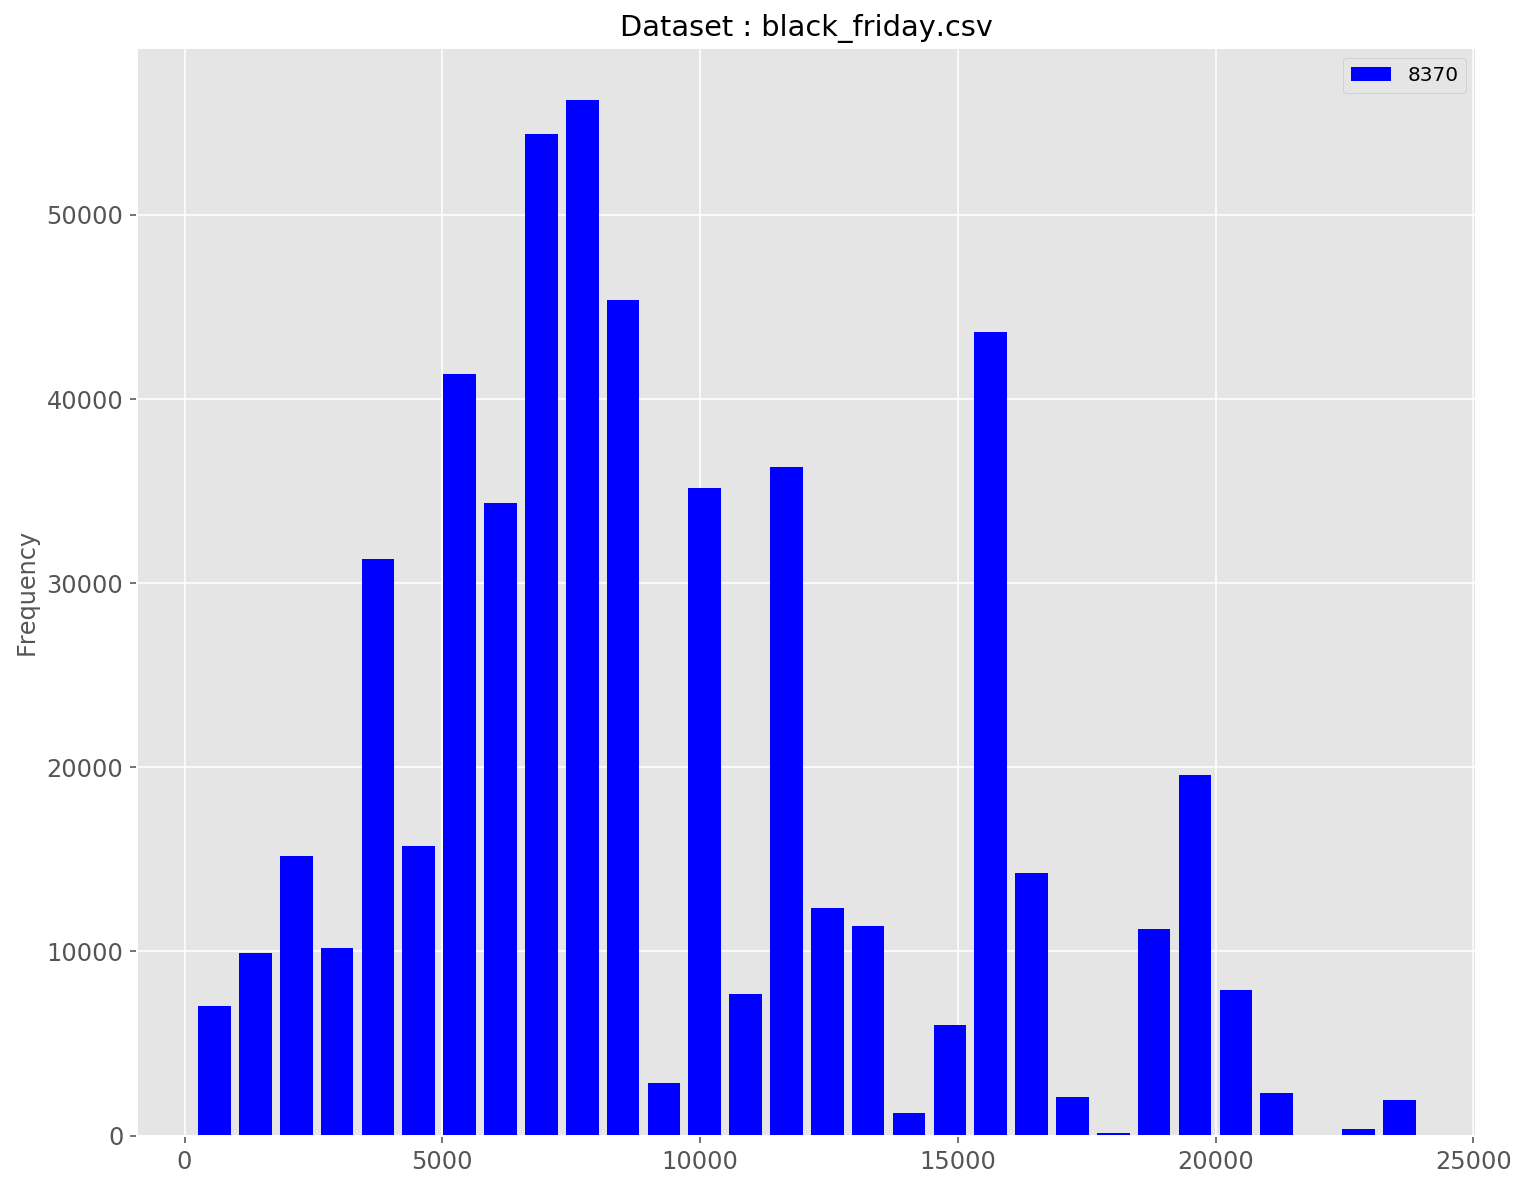

In [17]:
# histogram 
df3.plot(kind = 'hist',color = 'blue', bins =30, rwidth = 0.8, fontsize = 'large', figsize = (12,10), title = 'Dataset : black_friday.csv', grid = True)

### Visualisasi BoxPlot

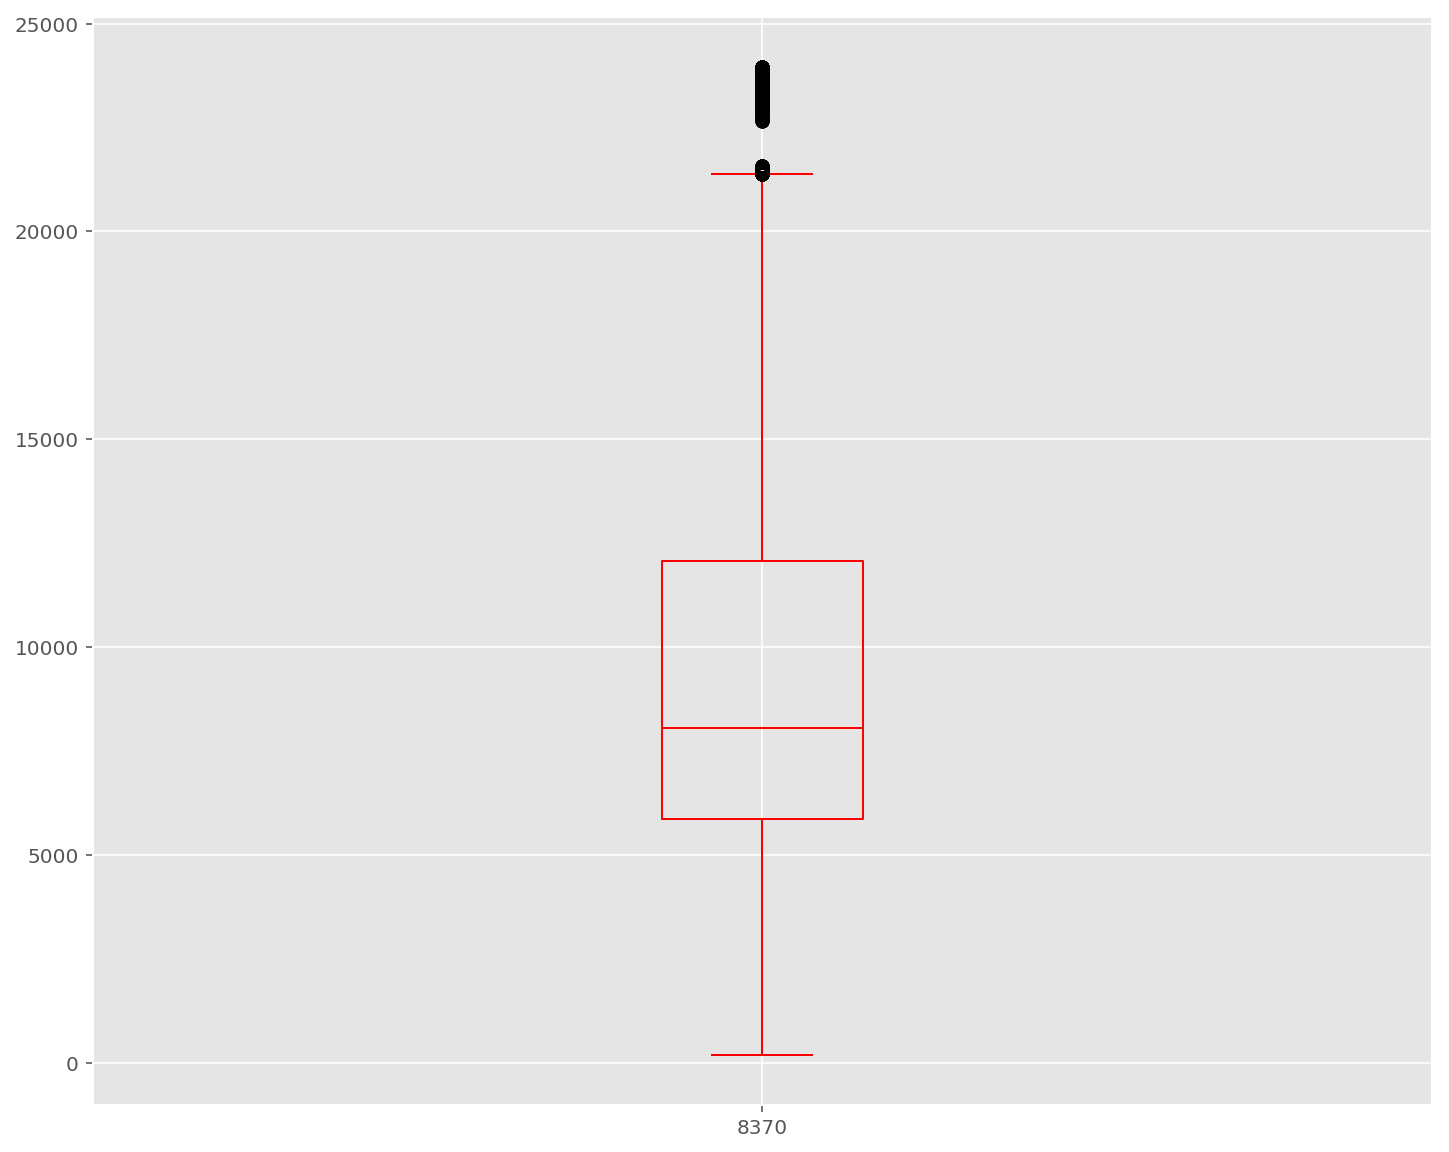

In [18]:
# box plot
df3.plot(kind = 'box', color = 'red', figsize= (12,10), grid =True) #Menampilkan grafik box plot pada dataframe black_friday

## Statistical Description

### Maximum

In [11]:
df3.columns = ['Dollar']
df3.max()

Dollar    23961
dtype: int64

### Minimum

In [8]:
df3.min()

8370    185
dtype: int64

### Mean

In [9]:
df3.mean()

8370    9333.861646
dtype: float64

### Mode

In [12]:
# mode
df3.mode().iloc[0]['Dollar']

6855

### Median

In [21]:
# median
df3.median()

8370    8062.0
dtype: float64

### Variance

In [22]:
# variance
df3.var()

8370    2.481063e+07
dtype: float64

### Standard Deviation

In [14]:
df3.std()

Dollar    4981.026592
dtype: float64

### Skewness

In [23]:
# skewness
df3.skew()

8370    0.624278
dtype: float64

### Kurtosis

In [24]:
# kurtosis
df3.kurtosis()

8370   -0.343127
dtype: float64

## Fungsi Distribusi Peluang

Text(0,0.5,'Frequency')

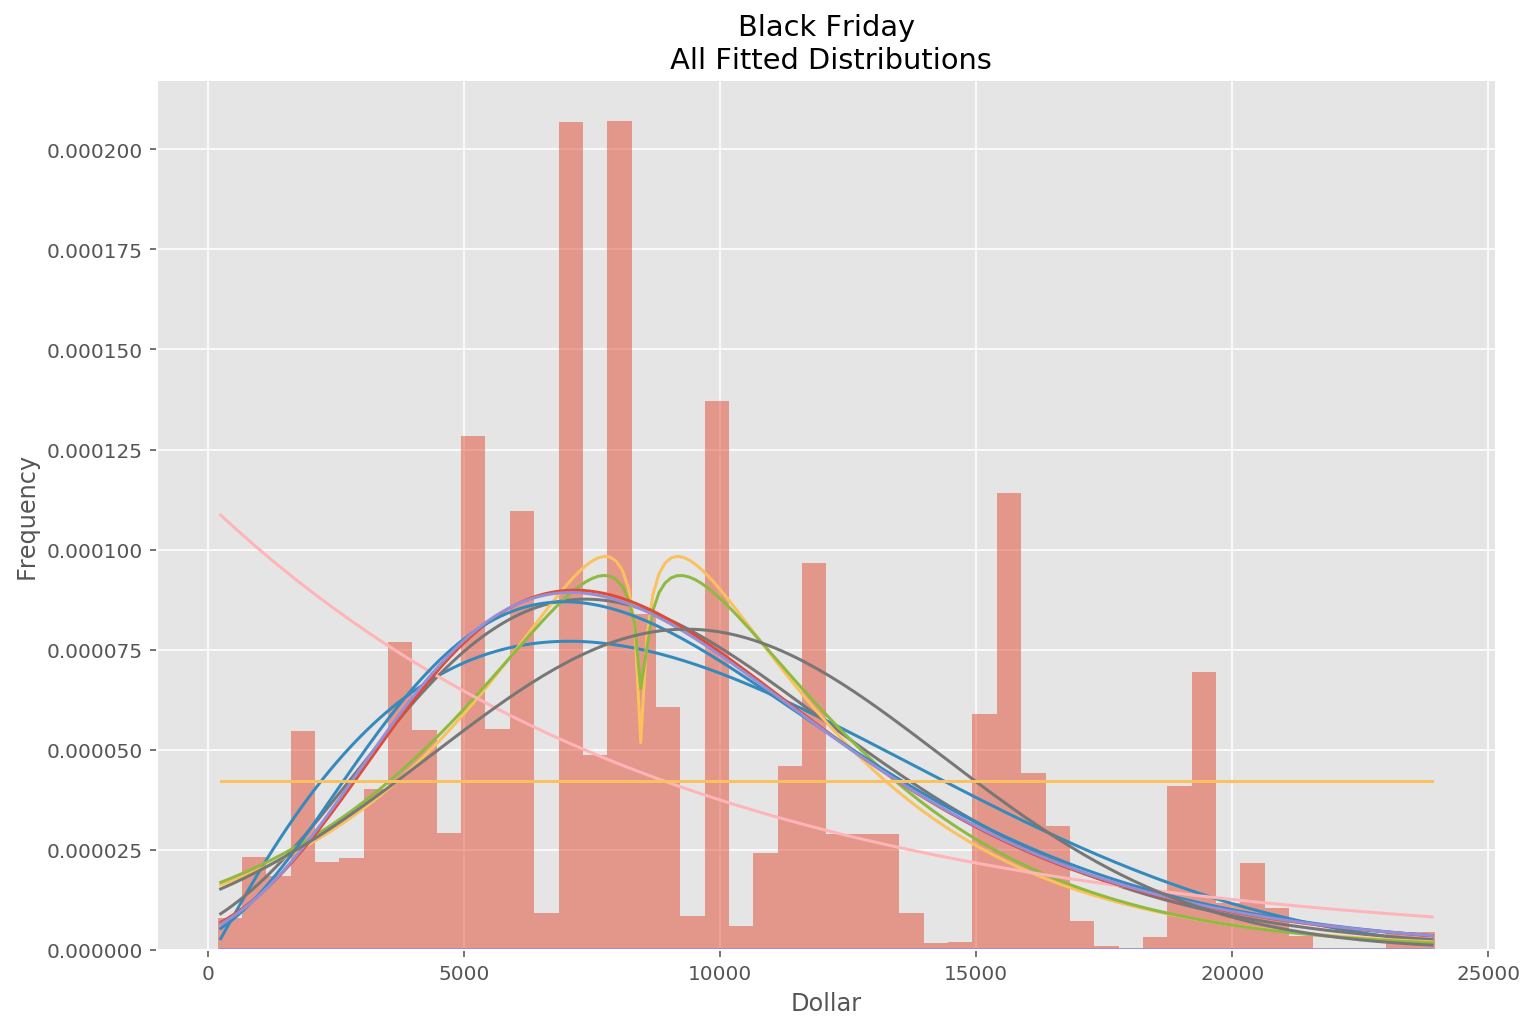

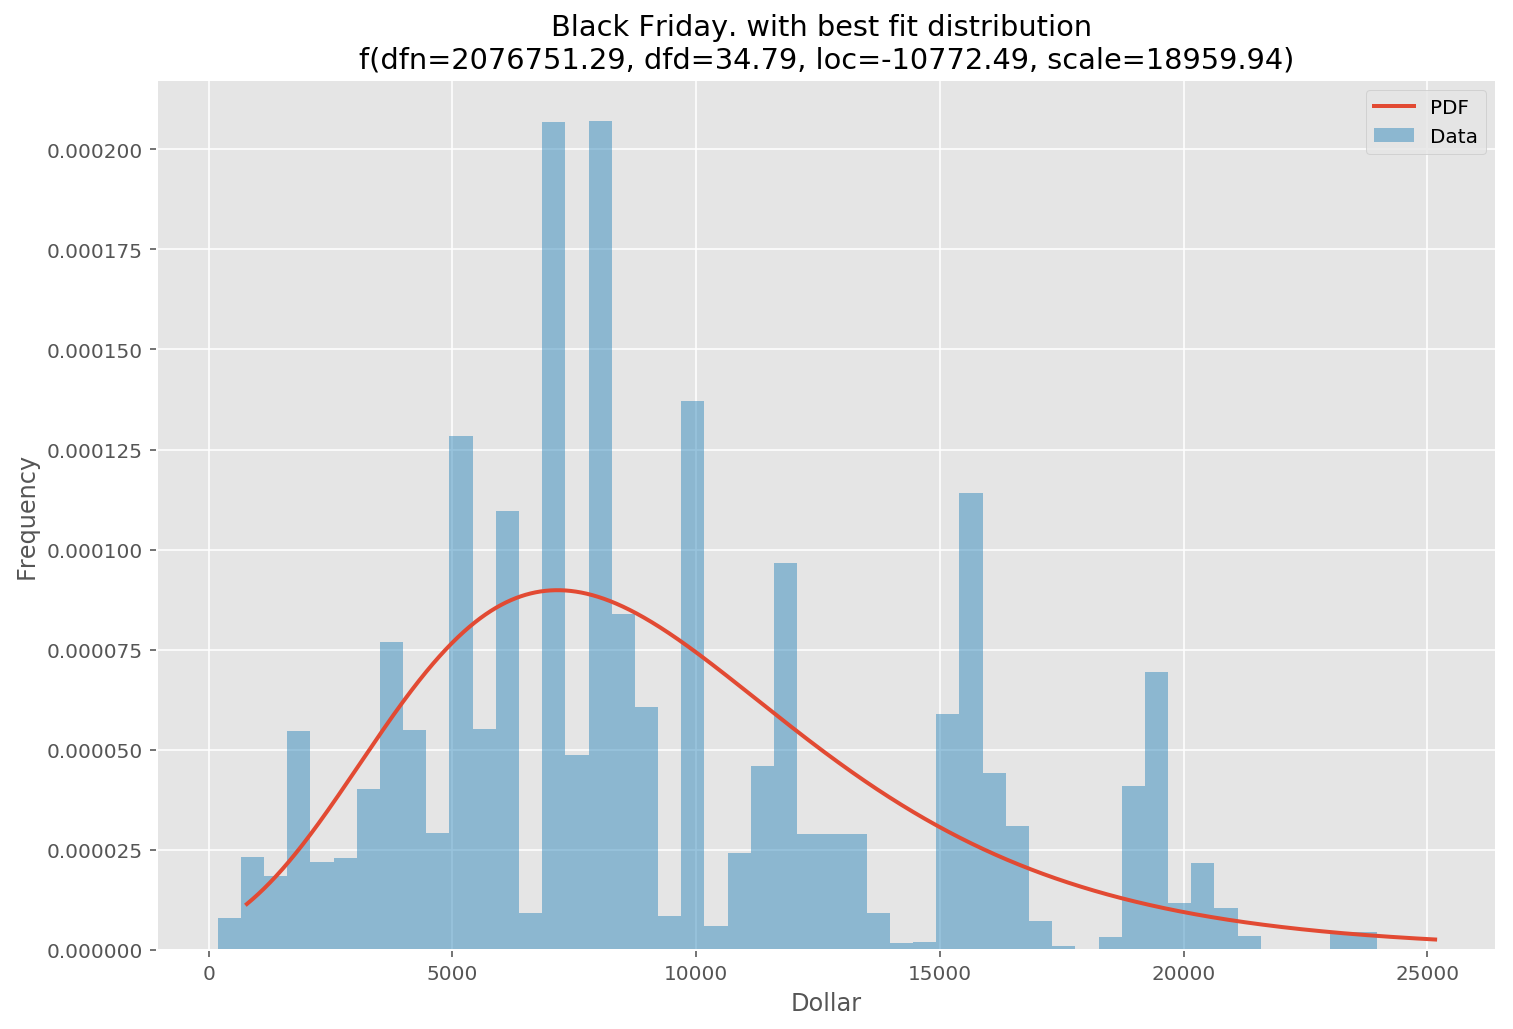

In [70]:
# Load data from statsmodels datasets
data = df3['8370']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Black Friday\n All Fitted Distributions')
ax.set_xlabel(u'Dollar')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Black Friday. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Dollar')
ax.set_ylabel('Frequency')

In [0]:
Alasan kami memilih distribusi fungsi peluang f dikarenakan grafik yang dihasilkan dengan bantuan SciPy menghasilkan distribusi f. Dibandingkan dengan distribusi yang lainnya, distribusi f menghasilkan hampiran yang paling mirip dengan distribusi yang ada pada soal black_friday.csv

## Pertanyaan

#### a. Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang:

##### i. Miskin (total pembelian kurang dari 1000 dolar)

In [72]:
print(math.floor(best_dist.cdf(1000,*best_fit_params)*250)) #Ekspektasi X<1000

3


##### ii. Kaya (total pembelian lebih dari 10000 dolar)

In [71]:
print(math.floor((1-best_dist.cdf(10000,*best_fit_params))*250)) #Ekspektasi X>10000

96


##### iii. Crazy Rich (total pembelian lebih dari 20000 dolar)

In [76]:
print(math.floor((1-best_dist.cdf(20000,*best_fit_params))*250)) #Ekspektasi X>20000

9


#### b. Jika terdapat 1000 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli:

##### i. Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif)

In [77]:
print(math.floor((best_dist.cdf(2000,*best_fit_params)-best_dist.cdf(1980,*best_fit_params))*1000)) #Ekspektasi 1980<X<1000

0


##### ii. MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif)

In [78]:
print(math.floor((best_dist.cdf(2897,*best_fit_params)-best_dist.cdf(2707,*best_fit_params))*1000)) #Ekspektasi 2707<X<2987

7


# Soal 4

## Visualisasi

### Visualisasi Histogram

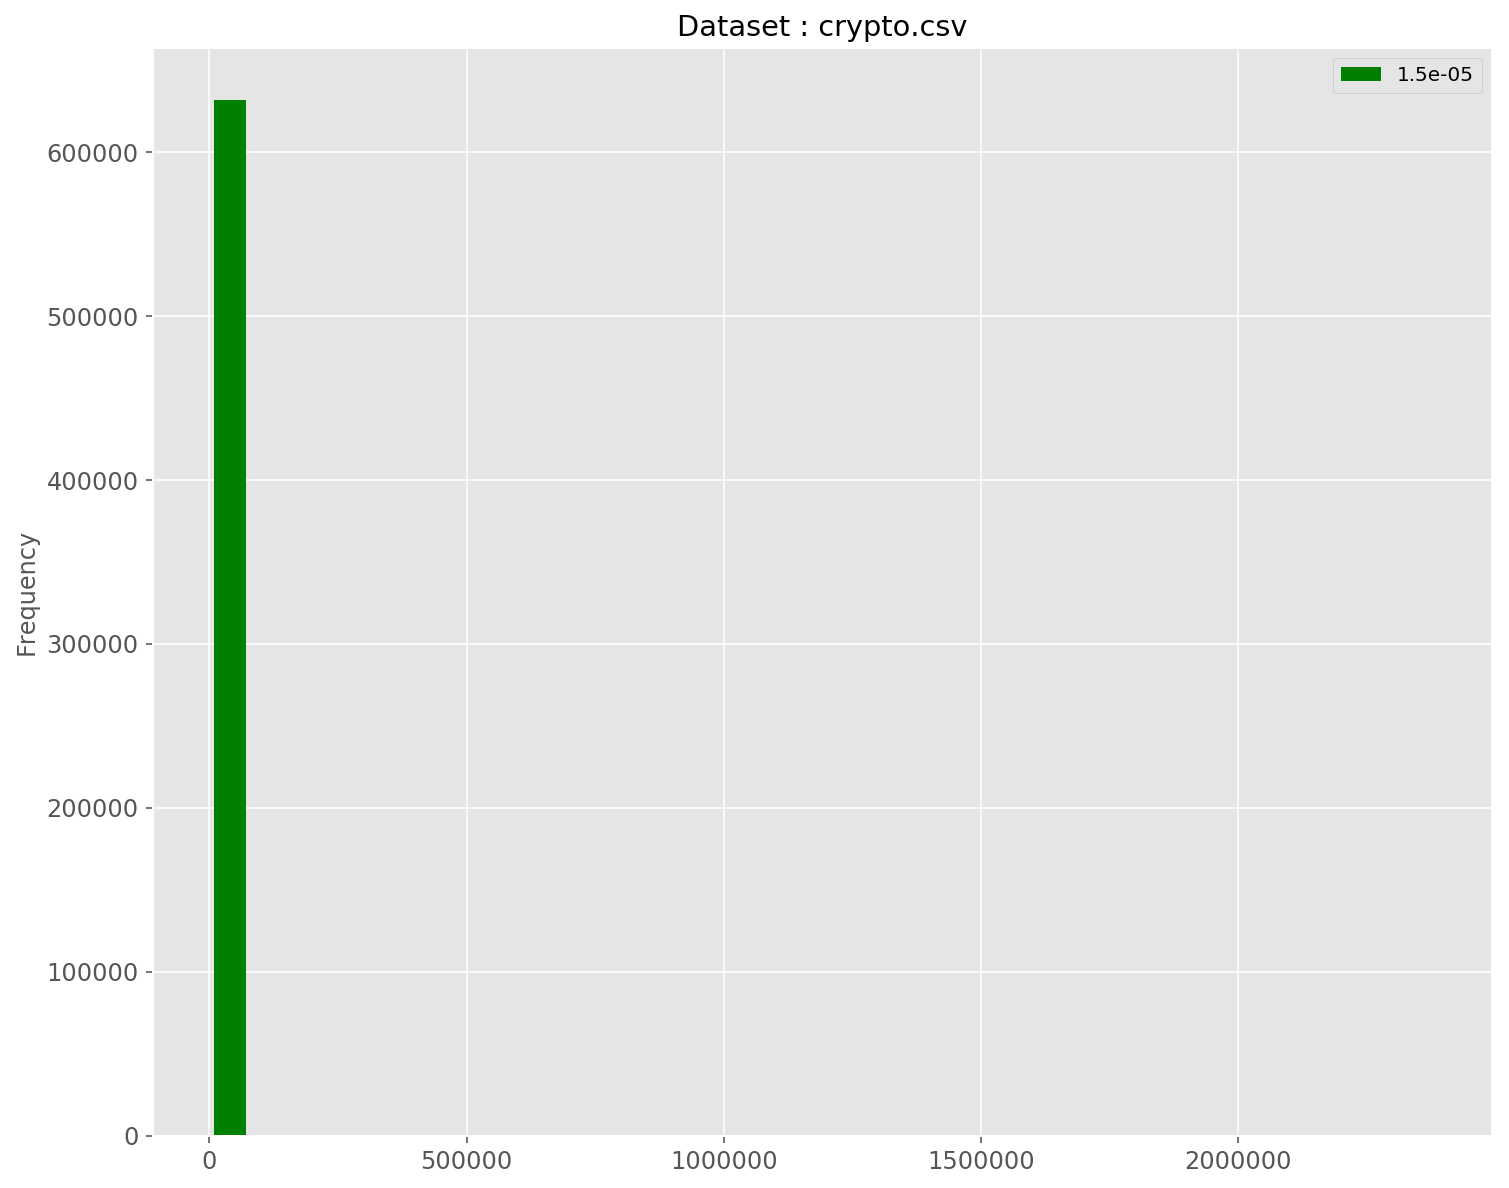

In [26]:
# histogram 
df4.plot(kind = 'hist',color = 'green', bins =30, rwidth = 0.8, fontsize = 'large', figsize = (12,10), title = 'Dataset : crypto.csv', grid = True)

### Visualisasi Box Plot

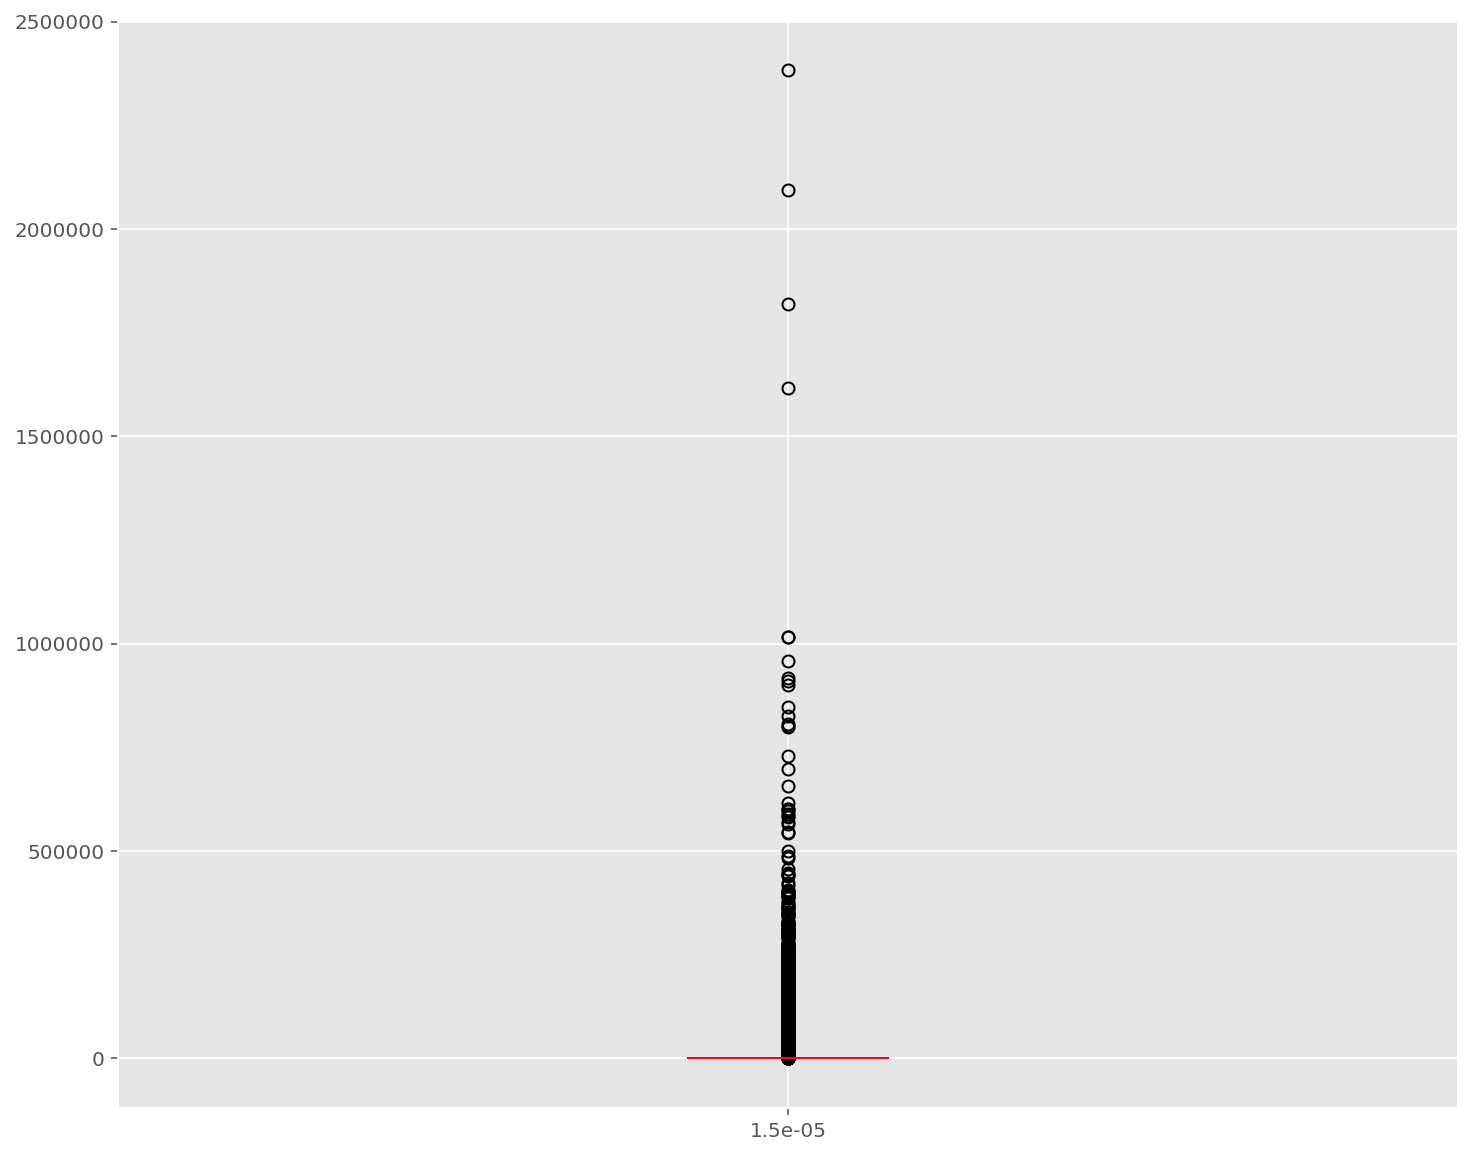

In [27]:
# box plot
df4.plot(kind = 'box', color = 'red', figsize= (12,10), grid =True) #Menampilkan grafik box plot pada dataframe crypto

## Statistical Description

### Maximum

In [15]:
df4.columns = ['Harga']
df4.max()

Harga    2383502.5
dtype: float64

### Minimum

In [16]:
df4.min()

Harga    2.925000e-09
dtype: float64

### Mean

In [17]:
df4.mean()

Harga    203.018467
dtype: float64

### Mode

In [18]:
# mode
df4.mode().iloc[0]['Harga']

2e-06

### Median

In [30]:
# median
df4.median()

1.5e-05    0.009734
dtype: float64

### Variance

In [31]:
# variance
df4.var()

1.5e-05    7.532053e+07
dtype: float64

### Standard Deviation

In [19]:
df4.std()

Harga    8678.740363
dtype: float64

### Skewness

In [32]:
# skewness
df4.skew()

1.5e-05    118.239514
dtype: float64

### Kurtosis

In [33]:
# kurtosis
df4.kurtosis()

1.5e-05    22297.435591
dtype: float64

## Fungsi Distribusi Peluang

Text(0,0.5,'Frequency')

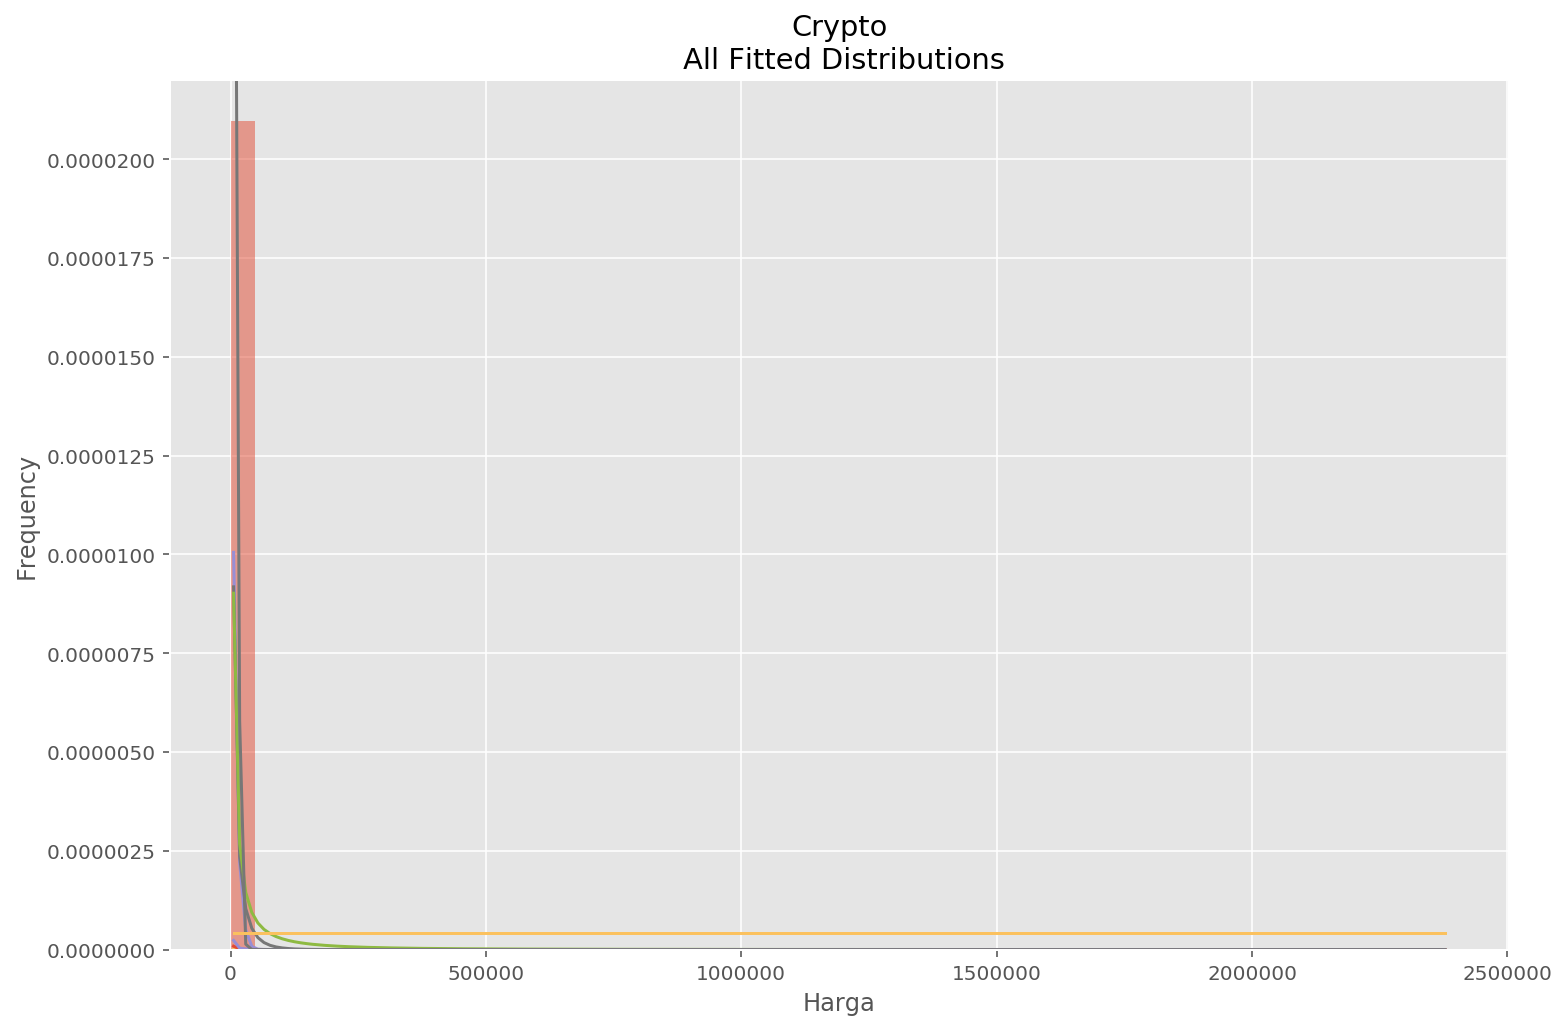

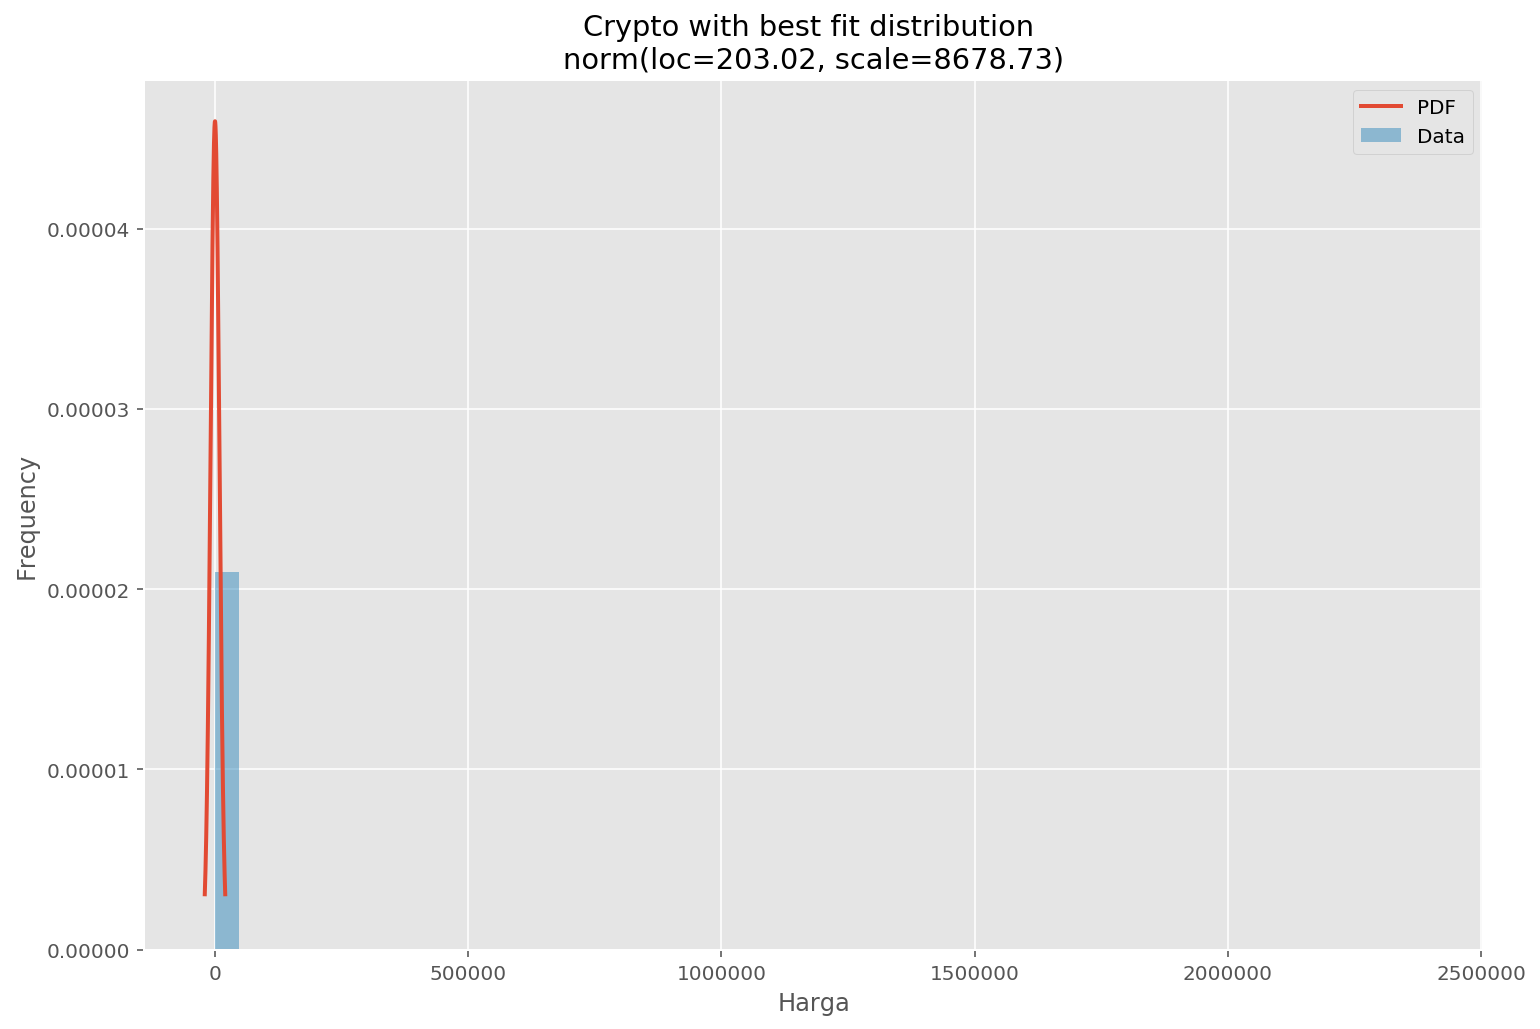

In [79]:
# Load data from statsmodels datasets
data = df4['1.5e-05']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Crypto\n All Fitted Distributions')
ax.set_xlabel(u'Harga')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Crypto with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Harga')
ax.set_ylabel('Frequency')

In [0]:
Alasan kami memilih distribusi fungsi peluang normal dikarenakan grafik yang dihasilkan dengan bantuan SciPy menghasilkan distribusi normal. Dibandingkan dengan distribusi yang lainnya, distribusi normal menghasilkan hampiran yang paling mirip dengan distribusi yang ada pada soal crypto.csv

## Pertanyaan

### a. Apabila hari ini terdapat 1000 data harga cryptocurrency baru, tentukan ekspektasi jumlah cryptocurrency yang nilainya

#### i. kurang dari 0.177013

In [82]:
print(math.floor(best_dist.cdf(0.177013,*best_fit_params)*1000)) #Ekspektasi X<0.177013

490


#### ii. lebih dari 177.013

In [80]:
print(math.floor((1-best_dist.cdf(177.013,*best_fit_params))*1000)) #Ekspektasi X>177.013

501


### b. Jika suatu hari terdapat sebuah cryptocurrency baru, tentukan peluang cryptocurrency tersebut bernilai

#### i. lebih dari 0.013

In [84]:
print(1-best_dist.cdf(0.013,*best_fit_params)) #Ekspektasi X>0.013

0.5093308636723615


#### ii. kurang dari 17.7

In [85]:
print(best_dist.cdf(17.7,*best_fit_params)) #Ekspektasi X<17.7

0.4914819652134494


# Soal 5

## Visualisasi

### Visualisasi Histogram

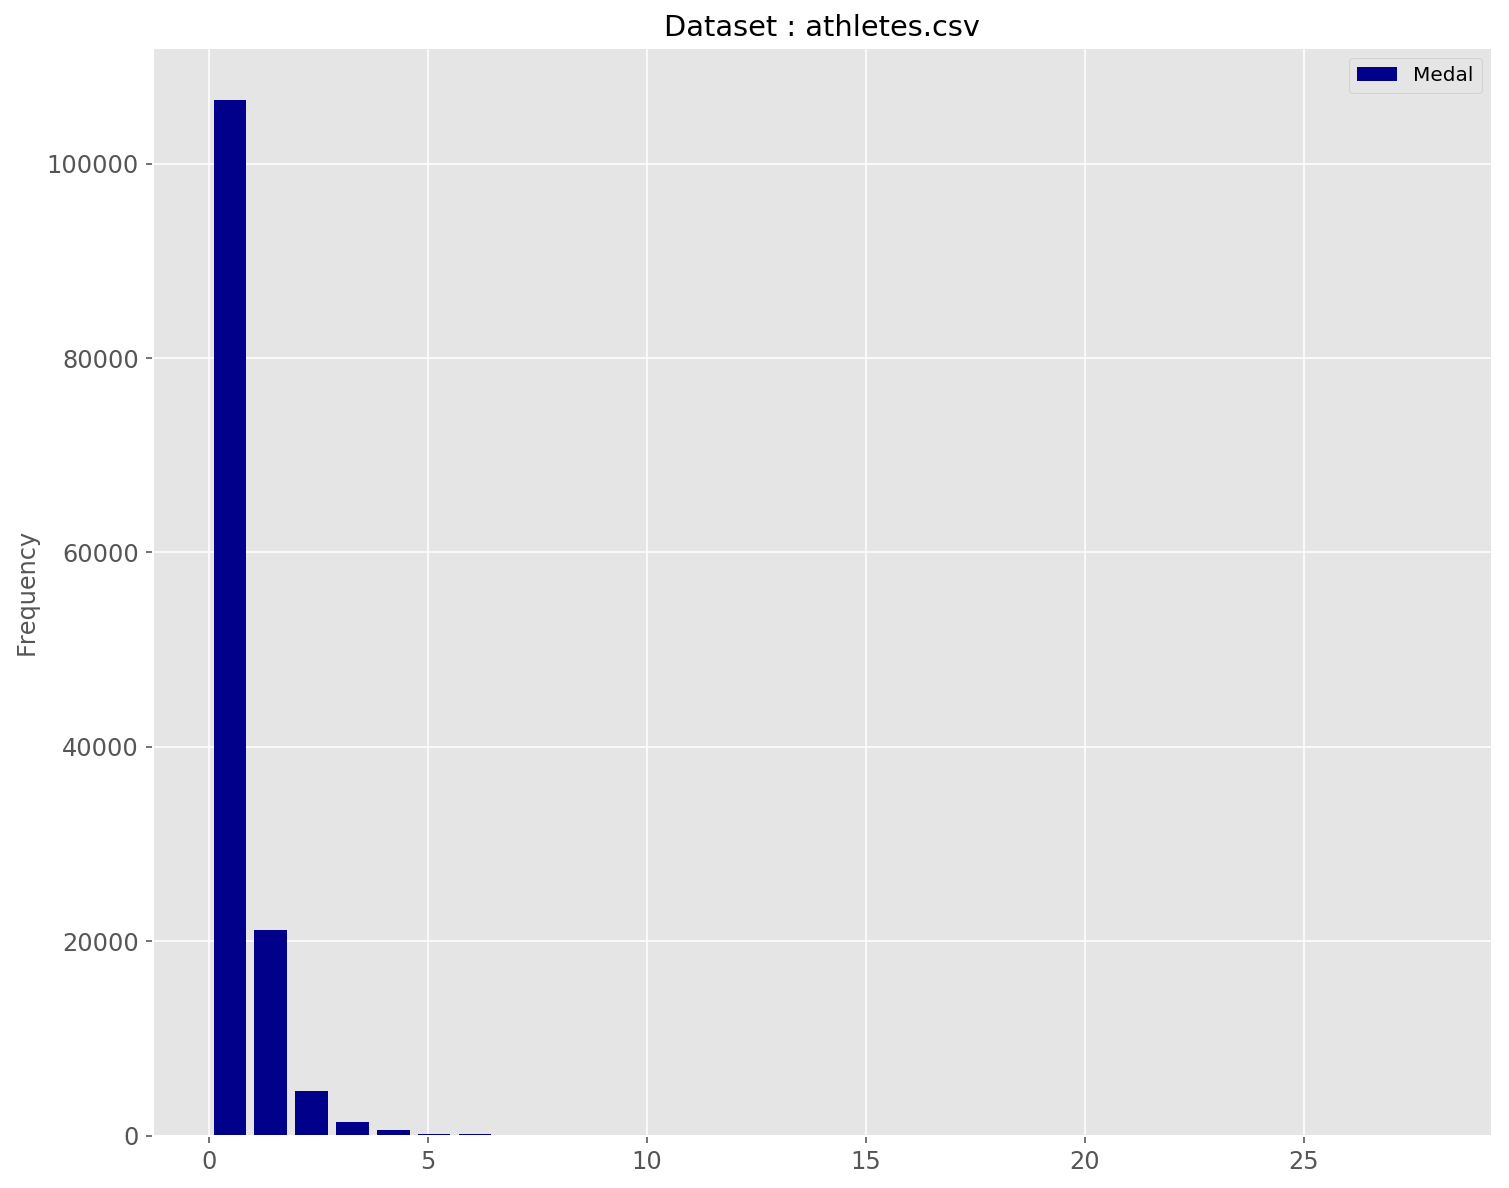

In [35]:
df5.plot(kind = 'hist',color = 'darkblue', bins =30, rwidth = 0.8, fontsize = 'large', figsize = (12,10), title = 'Dataset : athletes.csv', grid = True) #Menampilkan grafik histogram dari atribut nedal pada dataframe athlete

## Visualisasi BoxPlot

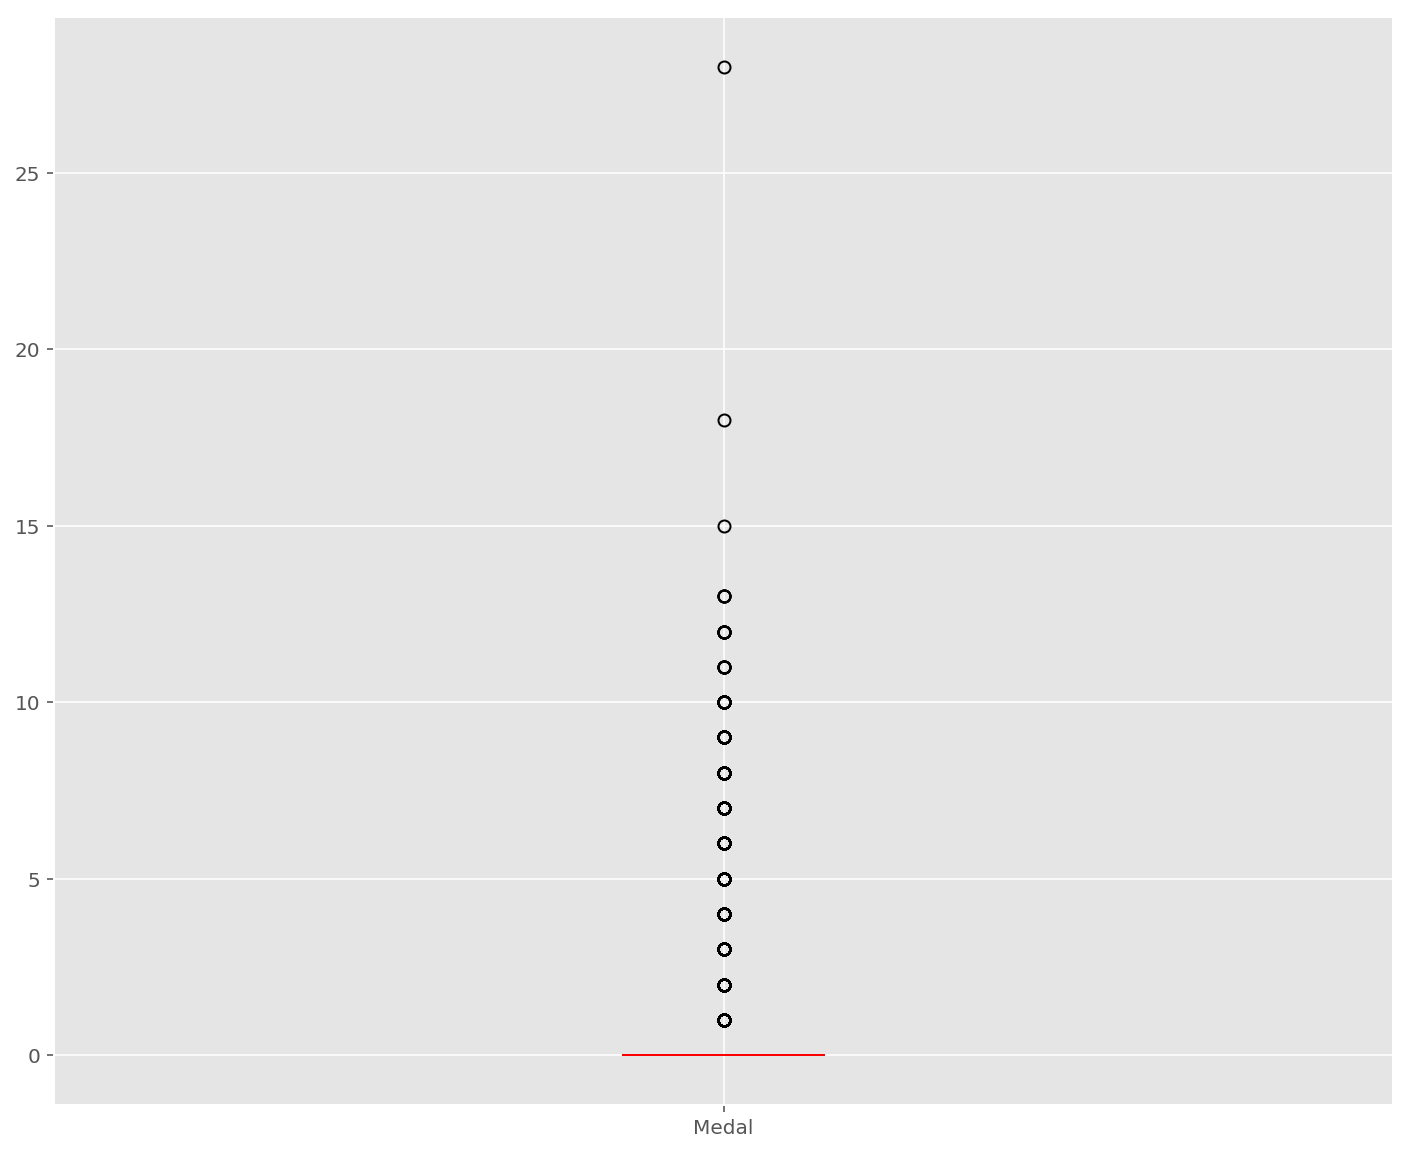

In [36]:
df5.plot(kind = 'box', color = 'red', figsize= (12,10), grid =True) #Menampilkan grafik box plot dari atribut medal pada dataframe athlete

## Statistical Description

### Maximum

In [37]:
df5.max(numeric_only=True) #Menampilkan medal terbanyak

Medal    28
dtype: int64

### Minimum

In [38]:
df5.min(numeric_only=True) #Menampilkan medal tersedikit

Medal    0
dtype: int64

### Mean

In [20]:
df5.mean() #Mendapatkan nilai mean dari dataframe athlete

Medal    0.295277
dtype: float64

### Median

In [40]:
df5.median() #mendapatkan nilai tengah/median dari dataframe athlete

Medal    0.0
dtype: float64

### Mode

In [21]:
df5.mode().iloc[0]['Medal'] #Mendapatkan nilai modus dari dataframe athlete

0.0

### Standard Deviation

In [42]:
df5.std() #mendapatkan standard deviasi dari dataframe athlete

Medal    0.724716
dtype: float64

### Variance

In [43]:
df5.var() #mendapatkan variansi dari dataframe athlete

Medal    0.525213
dtype: float64

### Skewness

In [44]:
df5.skew() #mendapatkan nilai skew dari dataframe athlete (right skew)

Medal    4.819999
dtype: float64

### Kurtosis

In [45]:
df5.kurtosis() #Mendapatkan nilai kurtosis dari dataframe athlete

Medal    51.562526
dtype: float64

## Fungsi Distribusi Peluang

Text(0,0.5,'Frequency')

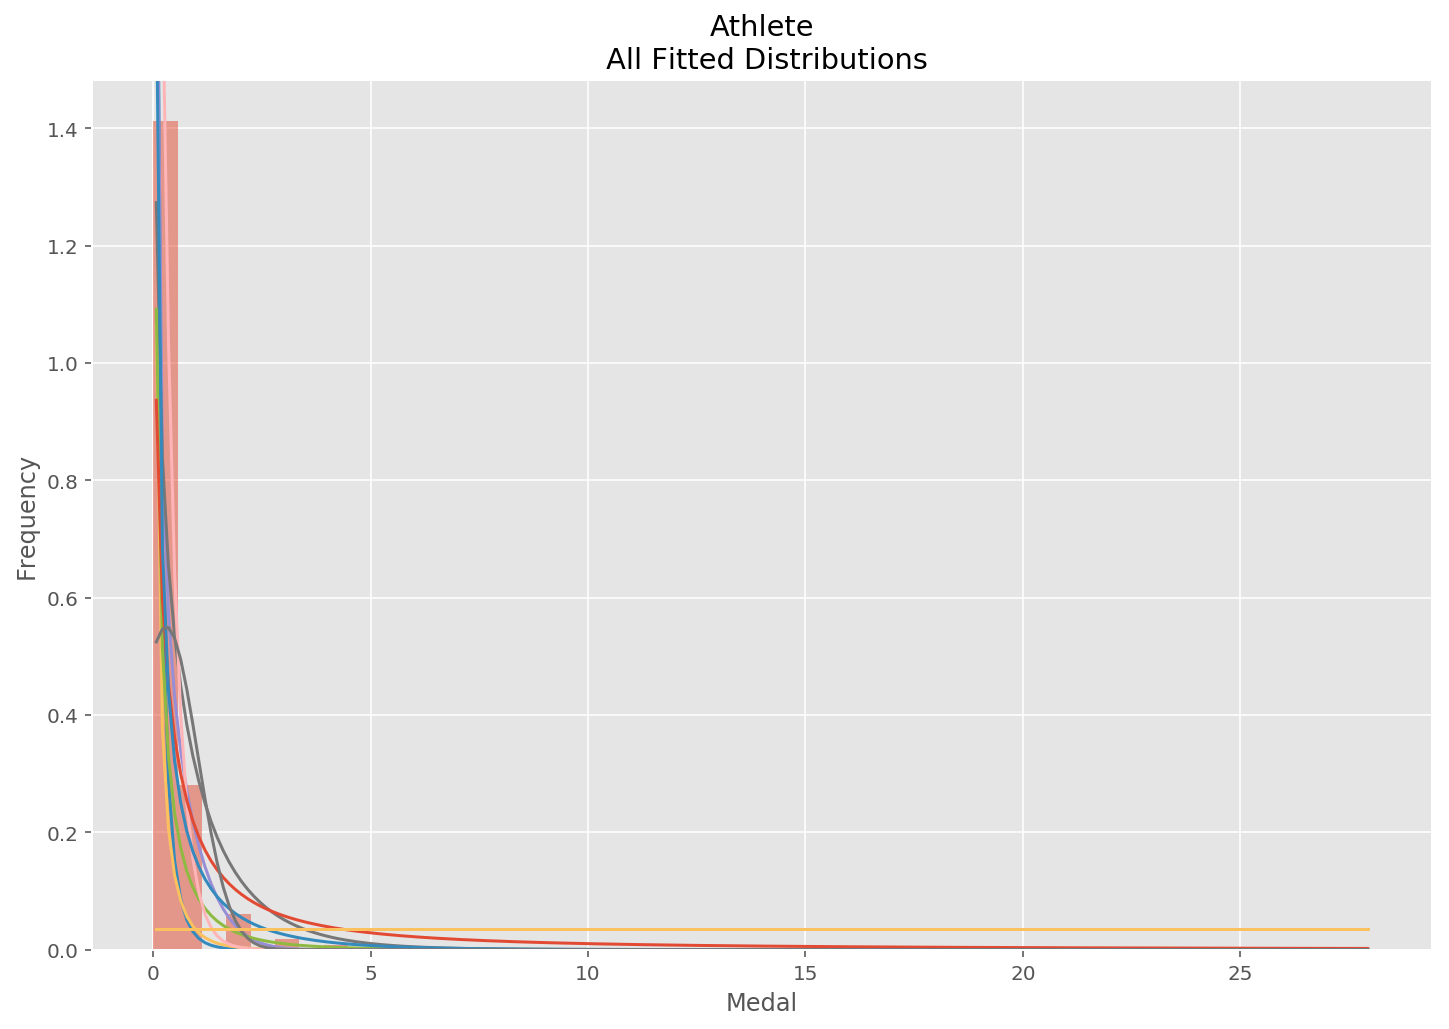

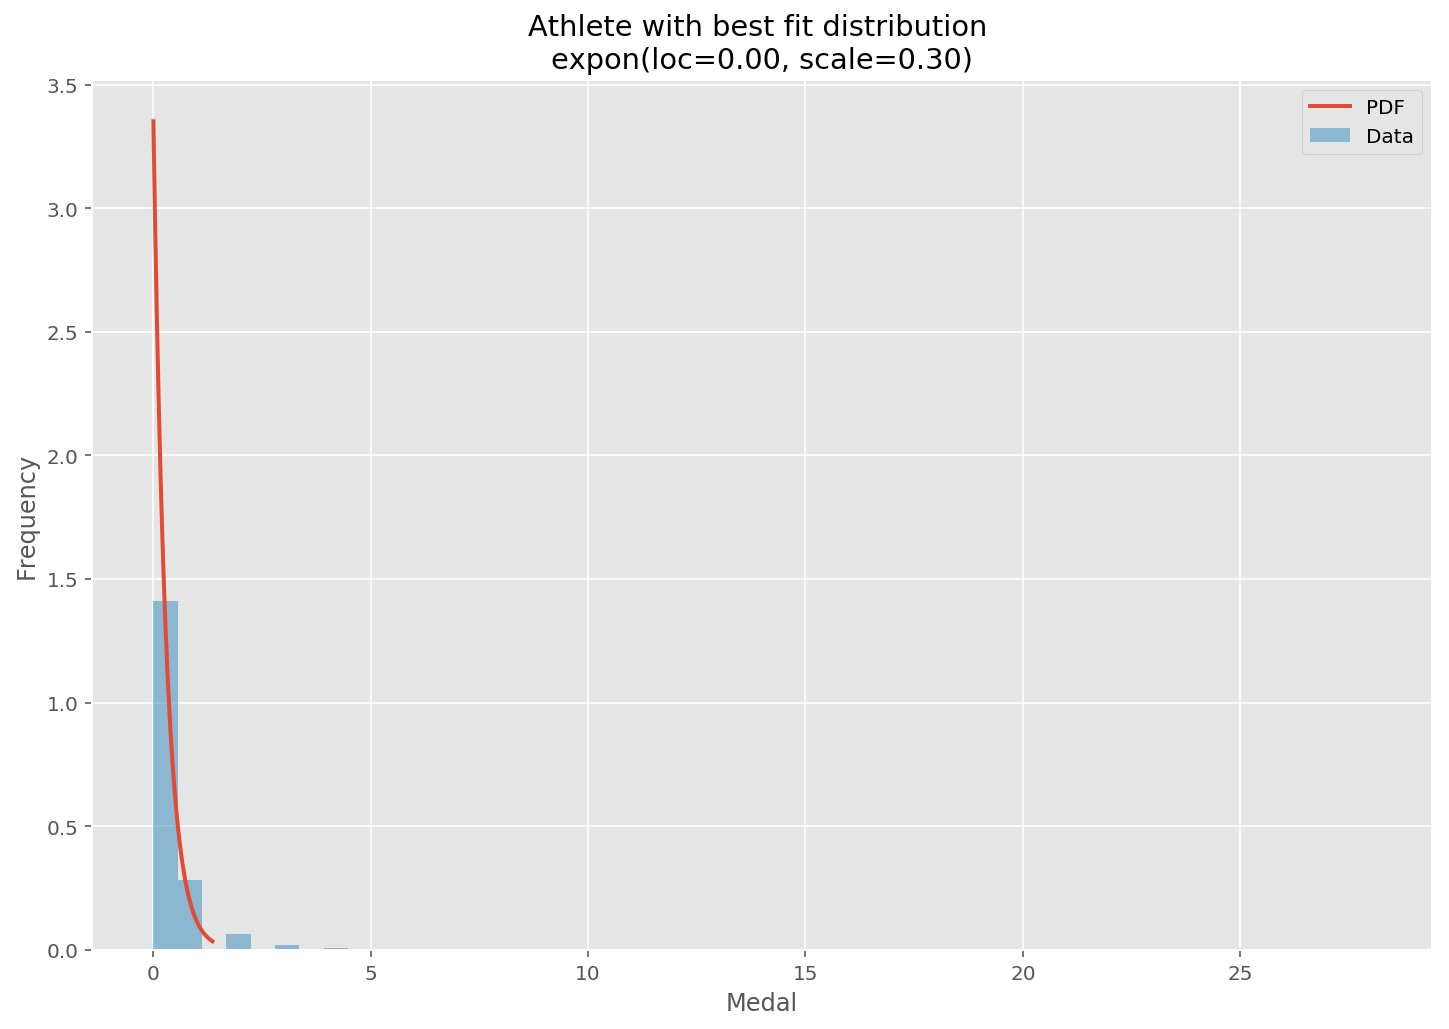

In [86]:
# Load data from statsmodels datasets
data = df5['Medal']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Athlete\n All Fitted Distributions')
ax.set_xlabel(u'Medal')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Athlete with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Medal')
ax.set_ylabel('Frequency')

In [0]:
Alasan kami memilih distribusi fungsi peluang eksponensial dikarenakan grafik yang dihasilkan dengan bantuan SciPy menghasilkan distribusi eksponensial. Dibandingkan dengan distribusi yang lainnya, distribusi eksponensial menghasilkan hampiran yang paling mirip dengan distribusi yang ada pada soal athletes.csv

## Pertanyaan

### a. Peluang Y meraih

#### i. tepat 0 medali

In [94]:
print(best_dist.cdf(0.5,*best_fit_params)-best_dist.cdf(0,*best_fit_params)) # P(X=0)

0.816092760476377


#### ii. lebih dari 10 medali

In [90]:
print(1-best_dist.cdf(9.5,*best_fit_params)) # P(X>10)

1.0658141036401503e-14


#### iii. tepat 3 medali

In [92]:
print(best_dist.cdf(3.5,*best_fit_params)-best_dist.cdf(2.5,*best_fit_params)) # P(X=3)

0.00020325972308932183


#### iv. 1 atau 5 medali

In [93]:
p_1 = best_dist.cdf(1.5,*best_fit_params)-best_dist.cdf(0.5,*best_fit_params)
p_5 = best_dist.cdf(5.5,*best_fit_params)-best_dist.cdf(4.5,*best_fit_params)
print(p_1 + p_5) # P(X=1 atau X=5)

0.17768738478347312


### b. Confidence interval  95%

In [22]:
# Nilai loc dan scale didapat dari grafik athlete with best distribution
# loc = 0.00
# scale = 0.30
st.expon.interval(0.95,0,0.3)

(0.007595342395286969, 1.1066638362341805)